# Data Science: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [50]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Understanding the structure of the data

In [51]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [52]:
rows = len(df.axes[0]) # this will give us the number of rows
print('The number of rows in the dataset is: ', rows, sep = "")

columns = len(df.axes[1]) # this will give us the number of columns
print('The number of columns in the dataset is: ', columns, sep = "")

The number of rows in the dataset is: 1898
The number of columns in the dataset is: 9


#### Observations: There are a total of 9 columns and 1898 rows in the dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset?

In [53]:
# Use info() to print a concise summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: The dataset has the following data types:
### order_id, customer_id, food_preparation_time and delivery_time are integer data types. Cost_of_the_order is float. restaurant_name, cuisine_type, day_of_the_week and rating are string data types.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [54]:
df.isnull().values.any()

False

#### Observations: The dataset does not have any null values


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [55]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: the minimum, average, and maximum time it takes for food to be prepared once an order is placed is 20 minutes, 27 minutes 22 seconds and 35 minutes respectively.


### **Question 5:** How many orders are not rated? [1 mark]

In [56]:
orders_not_rated = df.query("rating == 'Not given'").groupby(["rating"])["order_id"].count().reset_index()

orders_not_rated

,rating,order_id
0,Not given,736


#### Observations: The number of order that are not rated is 736.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions.

In [57]:
df.head(3)


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28


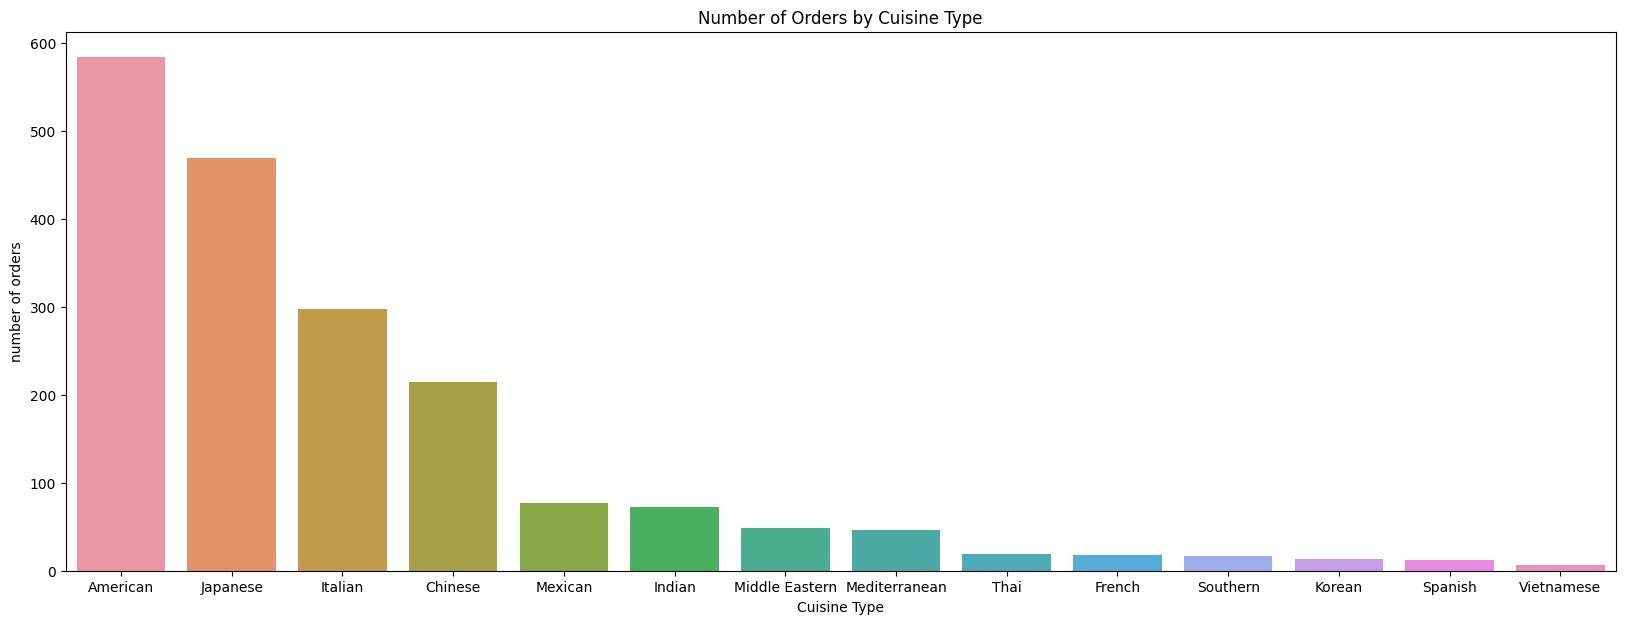

In [58]:
#the below will show us the sorted number of orders by Cuisine.

plt.figure(figsize = (20, 7))

sns.countplot(data = df, x = 'cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.title('Number of Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('number of orders')
plt.show()

### American cuisine has the highest number of order followed by Japanese. The lowest is Vietnamese.

In [59]:
def bar_percent(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (10, 5))


    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)
    plt.ylabel('Percent of Orders')
    plt.xlabel('Time of the Week')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of day of the week
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.show()

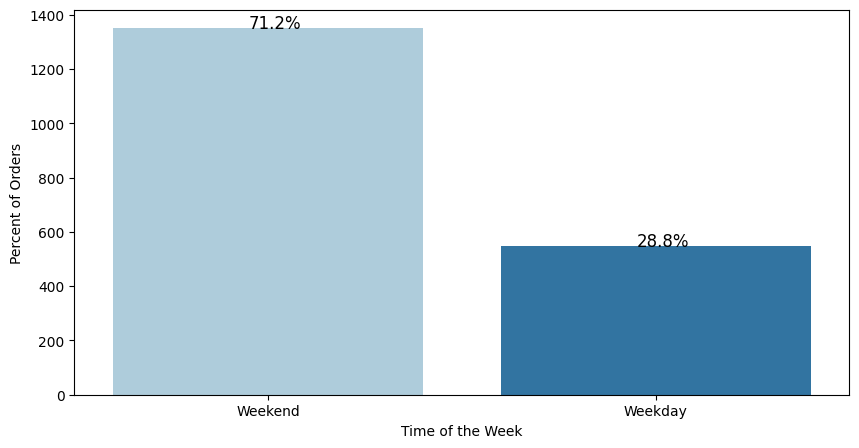

In [60]:
bar_percent(df, 'day_of_the_week')

### About 71% of the orders are over the weekend and 29% are during weekdays.

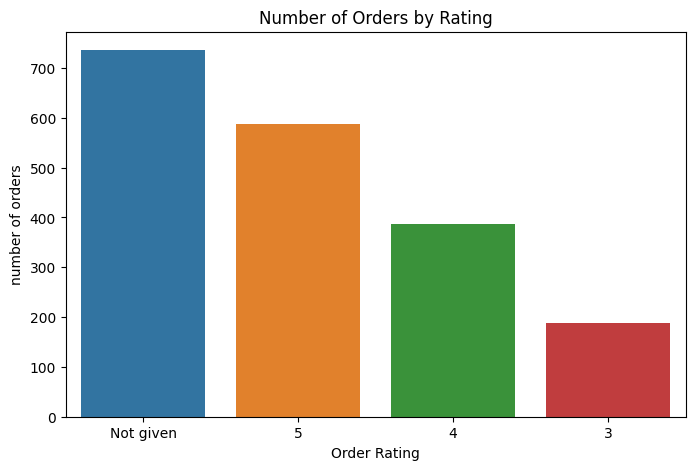

In [61]:
# The below will show count of orders by rating.
plt.figure(figsize = (8, 5))

sns.countplot(data = df, x = 'rating', order=df['rating'].value_counts().index)
plt.title('Number of Orders by Rating')
plt.xlabel('Order Rating')
plt.ylabel('number of orders')
plt.show()

### None of the orders has a low rating of 0, 1 or 2

<Axes: >

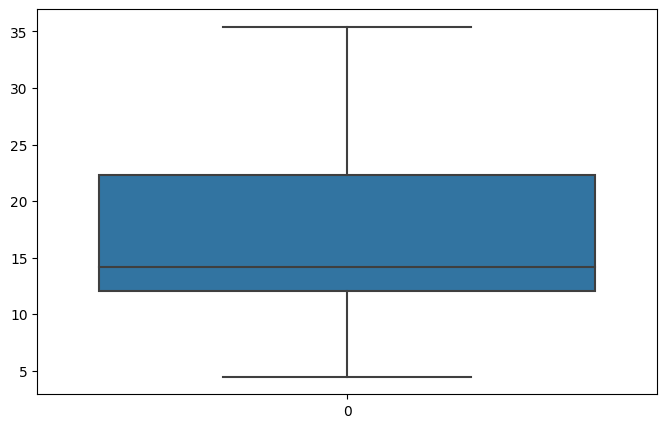

In [62]:
plt.figure(figsize = (8,5))
sns.boxplot(data = df.cost_of_the_order)

### The above box plot shows us that the maximum cost of an order is about 35, minimum is 5. The median is about 14.
### The distribution of cost of order is right skewed.
### 75% of the orders have a cost of about 23.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [63]:
df.groupby(["restaurant_name"])["order_id"].count().sort_values(ascending = False).reset_index(name = "num of orders").head(5)


,restaurant_name,num of orders
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations: the top 5 restaurants by count of orders are Shake Shack	219, The Meatball Shop	132, Blue Ribbon Sushi	119, Blue Ribbon Fried Chicken	96, Parm


### **Question 8**: Which is the most popular cuisine on weekends?

In [64]:
df_weekends = df.query("day_of_the_week == 'Weekend'")
df_weekends.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22


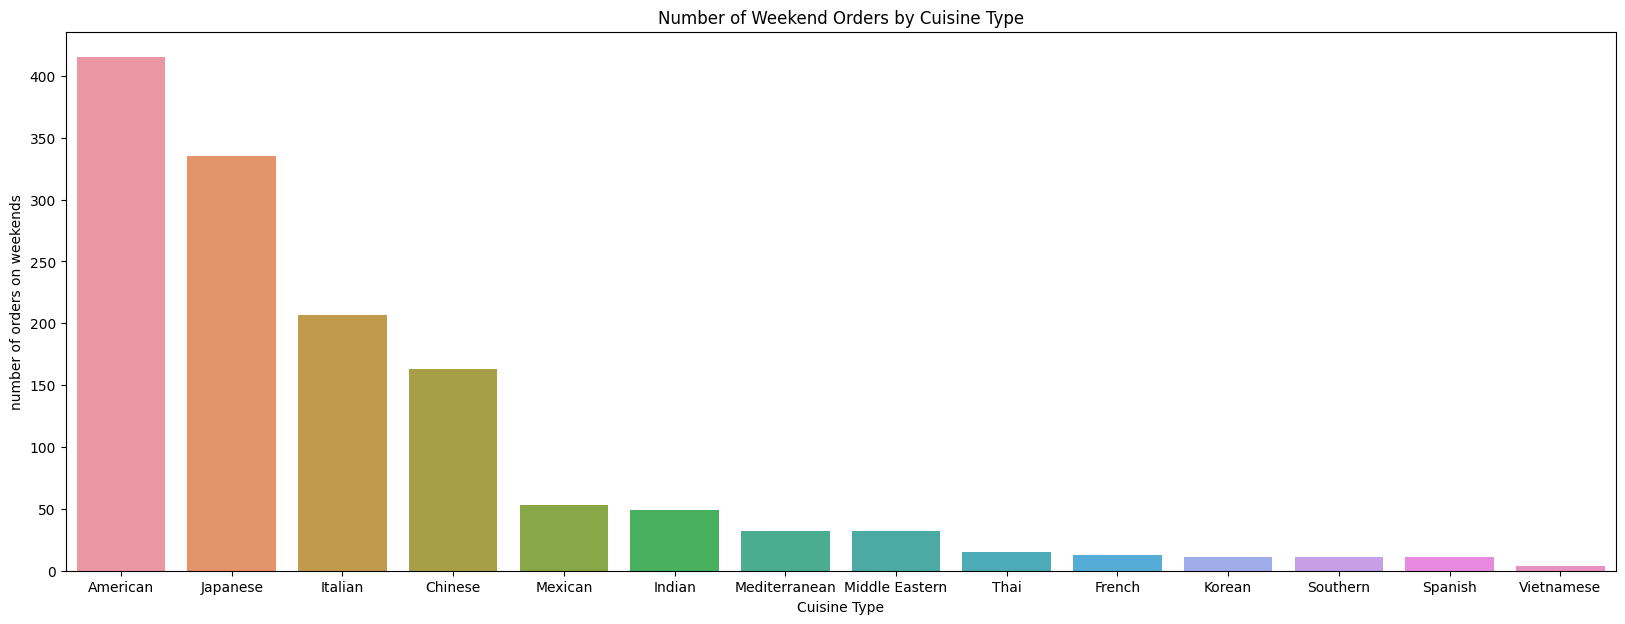

In [65]:
plt.figure(figsize = (20, 7))

sns.countplot(data = df_weekends, x = 'cuisine_type', order=df_weekends['cuisine_type'].value_counts().index)
plt.title('Number of Weekend Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('number of orders on weekends')
plt.show()

#### Observations: The moat popular cuisines during weekends ia American, followed by Japanese, Italian.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [66]:
total_num_orders = len(df['order_id'])
num_order_greater_20 = len(df[df['cost_of_the_order'] > 20]['order_id'])


In [67]:
percent_greater_20 = round(num_order_greater_20*100/total_num_orders, 1)

print("About ", percent_greater_20, "% of orders have a cost greater than 20.", sep = "")

About 29.2% of orders have a cost greater than 20.


#### Observations: About 29.2% of orders have a cost greater than 20.


### **Question 10**: What is the mean order delivery time?

In [68]:
round(df['delivery_time'].mean(), 2)

24.16

#### Observations: The mean order delibery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [69]:
df.groupby(["customer_id"])["order_id"].count().sort_values(ascending = False).reset_index(name = "number of orders").head(3)

,customer_id,number of orders
0,52832,13
1,47440,10
2,83287,9


#### Observations: The top 3 customers are 52832, 47440, 83287 and their number of orders are 13, 10, 9.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset.


In [70]:
df.head(3)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28


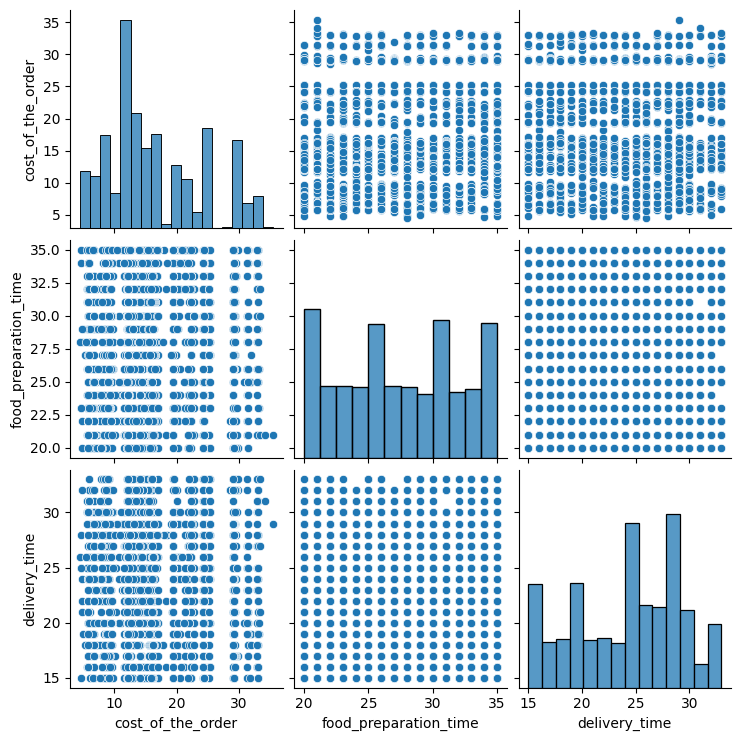

In [71]:
sns.pairplot(data = df[[
   "cost_of_the_order",
   "food_preparation_time",
   "delivery_time"
]])

<Axes: >

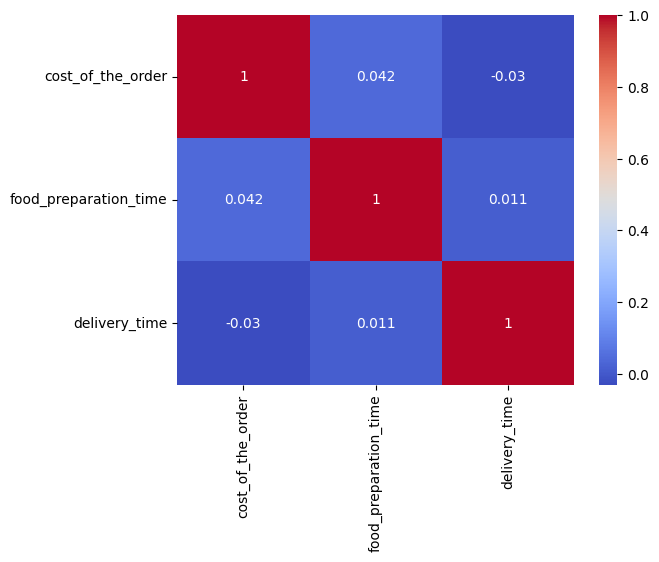

In [72]:
# let's check the heatmap for correlation
corr = df[["cost_of_the_order",
   "food_preparation_time",
   "delivery_time"]].corr()

sns.heatmap(corr,annot = True, cmap = 'coolwarm')

There is no correlation among the numberical variables.

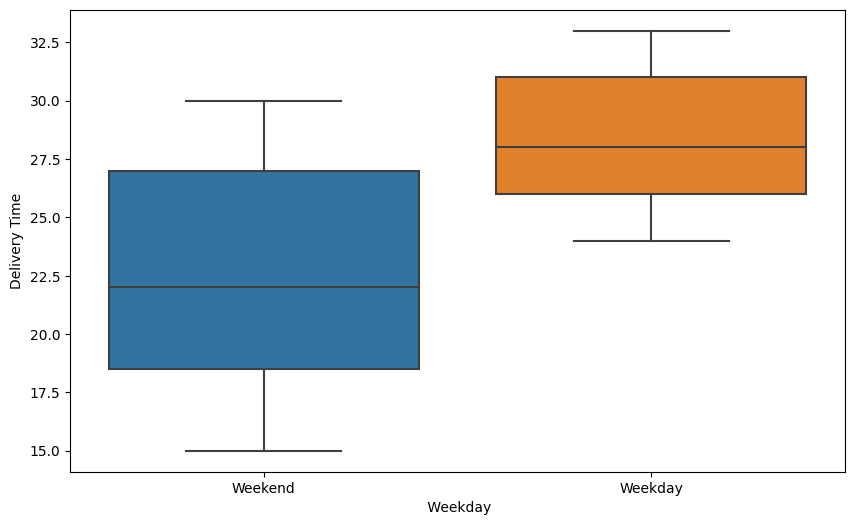

In [73]:
plt.figure(figsize = (10, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.ylabel('Delivery Time')
plt.xlabel(' Weekday')
plt.show()

### The median delivery time is higher during the week than during the weekend. The median delivery time of weekend is even lower than the minimum delivery time during the week.

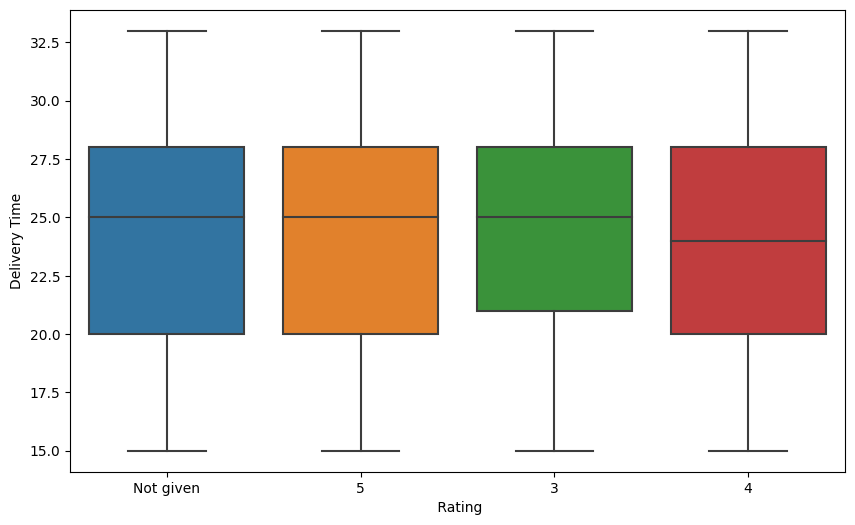

In [74]:
plt.figure(figsize = (10, 6))
sns.boxplot(x='rating', y='delivery_time', data=df)
plt.ylabel('Delivery Time')
plt.xlabel(' Rating')
plt.show()

### The above boxplot shows that delivery time does not impact rating much.

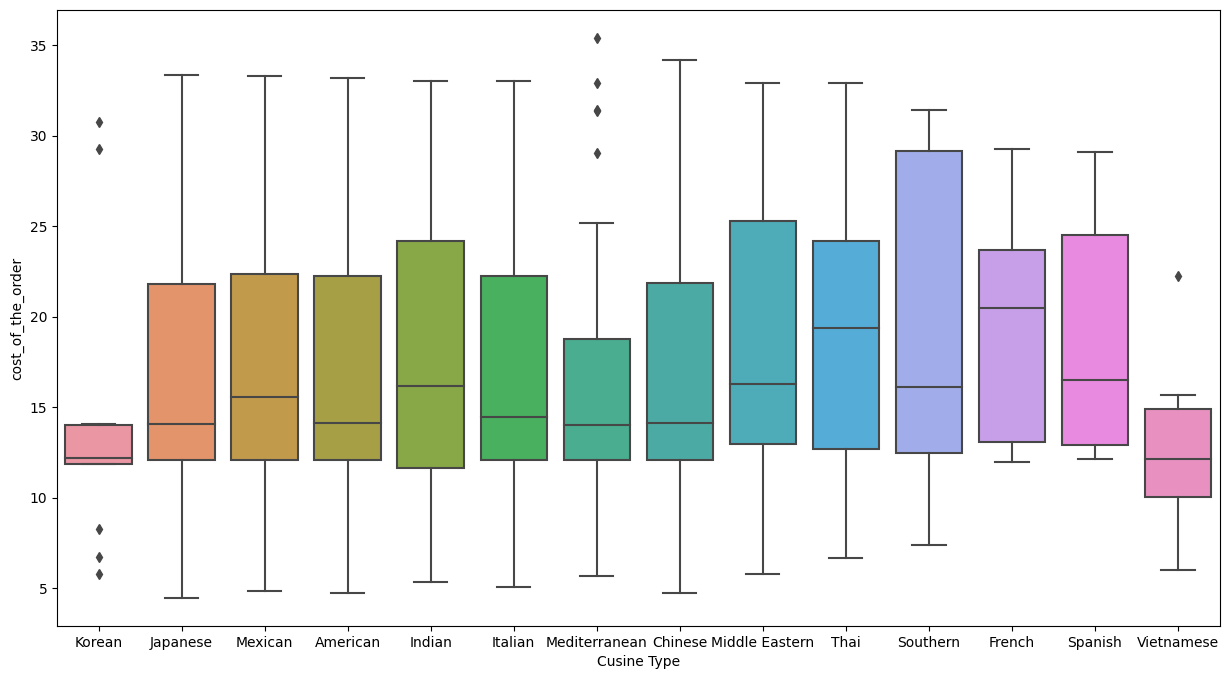

In [75]:
plt.figure(figsize = (15, 8))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.ylabel('cost_of_the_order')
plt.xlabel('Cusine Type')
plt.show()

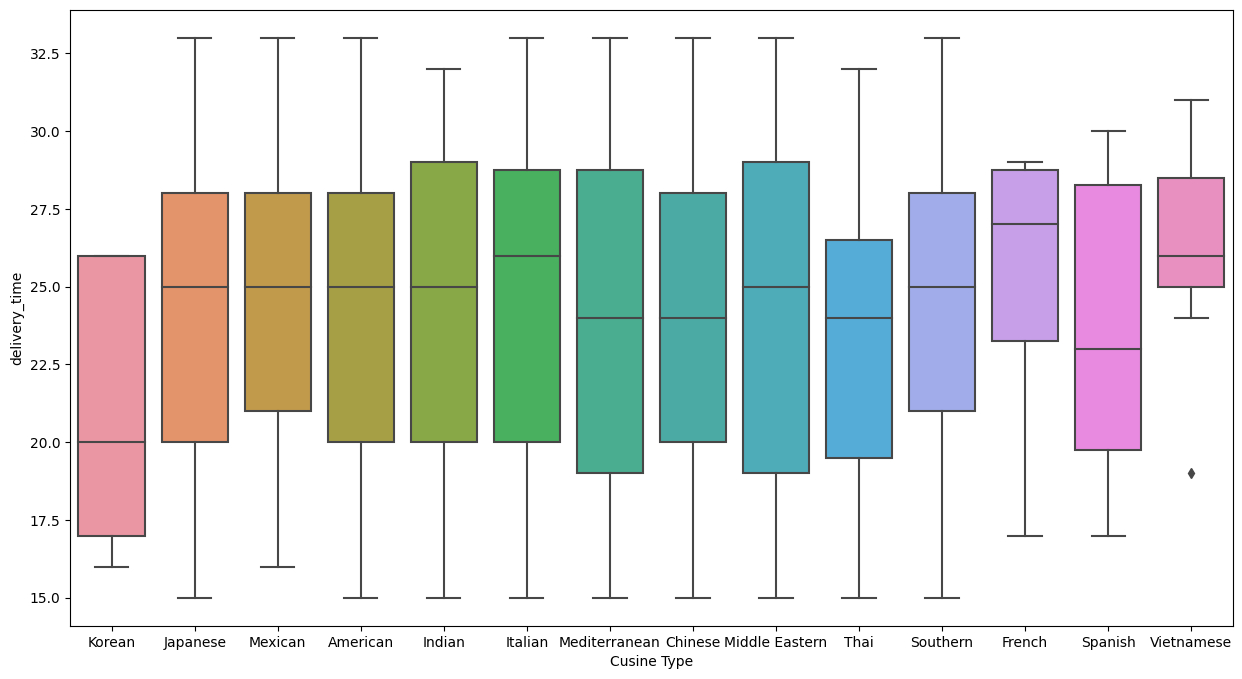

In [76]:
plt.figure(figsize = (15, 8))
sns.boxplot(x='cuisine_type', y='delivery_time', data=df)
plt.ylabel('delivery_time')
plt.xlabel('Cusine Type')
plt.show()

### There are outliers in cost of the order in Korean, Mediteranean and Vietnamese cuisines. The highest median cost is of French cuisine. Moreover, cost of food of Southern cuisine has high variance whereas that Korean is pretty much spread closer to the median with low variance.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [77]:
df_1 = pd.DataFrame(df.groupby(["restaurant_name"])["rating"].count().sort_values(ascending = False).reset_index(
    name = "count of ratings"))

# the above gives us the count of ratings by each restaurant.

In [78]:
#converting column data type into int rating not given to zero and then replacing zero with NaN to get to the mean of ratings.

df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(0).astype(int)

df['rating'].replace(0, np.nan, inplace=True)

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


In [79]:
df_m = pd.DataFrame(df.groupby(["restaurant_name"])["rating"].mean().sort_values(ascending = False).reset_index(
    name = "mean of ratings"))
df_final = pd.merge(df_m, df_1, on='restaurant_name', how='inner')
df_final.head()

#the above joins the two dataframes of count of rating and mean ratings by restaurant

,restaurant_name,mean of ratings,count of ratings
0,'wichcraft,5.0,1
1,Ravagh Persian Grill,5.0,3
2,Chola Eclectic Indian Cuisine,5.0,1
3,Chote Nawab,5.0,1
4,Junoon,5.0,5


In [80]:
rating_greater_50 = df_final[df_final["count of ratings"] > 50].reset_index()

rating_greater_50

,index,restaurant_name,mean of ratings,count of ratings
0,66,The Meatball Shop,4.511905,132
1,89,Blue Ribbon Fried Chicken,4.328125,96
2,93,Shake Shack,4.278195,219
3,99,RedFarm Broadway,4.243902,59
4,101,Blue Ribbon Sushi,4.219178,119
5,104,RedFarm Hudson,4.176471,55
6,107,Parm,4.128205,68


### The above shows the restaurants with mean greater than 4 and count of ratings greater than 50.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [81]:
df['restaurant_name'].nunique()

178

In [82]:
# Restaurants by total cost of orders
df_cost = pd.DataFrame(df.groupby(["restaurant_name"])["cost_of_the_order"].sum().reset_index(name = "total cost of orders"))

df_cost


,restaurant_name,total cost of orders
0,'wichcraft,8.10
1,12 Chairs,88.57
2,5 Napkin Burger,79.84
3,67 Burger,29.05
4,Alidoro,12.61
...,...,...
173,Zero Otto Nove,18.05
174,brgr,19.79
175,da Umberto,52.86
176,ilili Restaurant,343.22


In [83]:
# Restaurants with total cost of orders greater than 20
df_cost_20 = df_cost[df_cost['total cost of orders'] > 20]


#Restaurants with total cost of orders greater than 5
df_cost_5 = df_cost[(df_cost['total cost of orders'] > 5) & (df_cost['total cost of orders'] <= 20)]


In [84]:
df_cost_20.head(3)

,restaurant_name,total cost of orders
1,12 Chairs,88.57
2,5 Napkin Burger,79.84
3,67 Burger,29.05


In [85]:
df_cost_5.head(3)

,restaurant_name,total cost of orders
0,'wichcraft,8.10
4,Alidoro,12.61
7,Anjappar Chettinad,16.44


In [86]:

#Revenue from Restaurants with total cost of orders greater than 20 and cost greater than 5
revenue_total= ((df_cost_20['total cost of orders'].sum()) * 1.25) + ((df_cost_5['total cost of orders'].sum()) * 1.15)

print("The total revenue of the company from restaurants with cost greater than 20 and 5 is: ", round(revenue_total, 2), sep = "")

The total revenue of the company from restaurants with cost greater than 20 and 5 is: 39090.23


#### Observations: The total revenue of the company from restaurants with cost greater than 20 and 5 is USD 39090.23


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [87]:
df.head(3)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28


In [88]:
# get the total delivery time by order ID

df['total delivery time'] = df['delivery_time'] + df['food_preparation_time']
# get the orders with delivery time greater than 60
perc_of_orders_greater_60 = round((df[df['total delivery time'] > 60]['order_id'].count())*100 / (df['order_id'].count()), 1)

print("The percent of orders with delivery time greater than 60 minutes is: ", perc_of_orders_greater_60, "%", sep = "")

The percent of orders with delivery time greater than 60 minutes is: 10.5%


#### Observations: The percent of orders with delivery time greater than 60 minutes is: 10.5%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [89]:
df_d_w = pd.DataFrame(df.groupby(["day_of_the_week"])["delivery_time"].mean().reset_index(name = "mean delivery time"))
df_d_w

,day_of_the_week,mean delivery time
0,Weekday,28.340037
1,Weekend,22.470022


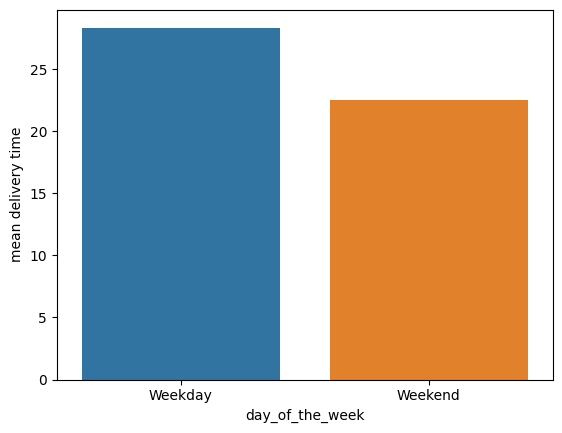

In [90]:
sns.barplot(df_d_w, x = 'day_of_the_week', y = 'mean delivery time')
plt.show()

#### Observations: The mean delivery time for weekday is higher than mean delivery time of weekend by 6 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

### Conclusions:
* The company has higher number of orders on weekends than on weekdays.
* American cuisine is the most popular type.
* The delivery time does not really have any impact on the rating of the order.
* There is no correlation among the numeric variables.

### Recommendations:

*  According to Question 6, the top 3 cuisine types by demand (volume of orders) are American followed by Japanese and Italian. Therefore, the company should focus on these three cuisine types.
*  According to question 12, the median cost of French is the highest which means it can drive revenue for the company. Hence, the company should promote French cuisine in its marketing strategy.
* The delivery time of orders on weekends is lower than that of weekdays. Also, the volume of orders on weekends (71%) is higher than that on weekdays (29%). Hence, the company should work on focusing its supply of delivery team on weekends more than week days.

---